# Quasi-Newton

Natasha Watkins

In [96]:
import numpy as np
from scipy.linalg import norm
from scipy.optimize import rosen, rosen_der, rosen_hess, fmin_bfgs
import time
import matplotlib.pyplot as plt

## Problem 1

In [82]:
def newton(f_prime, f_prime2, x0, maxiter=500, tol=1e-5):
    
    diff = 1e3
    i = 0
    x = x0
    
    while diff > tol and i < maxiter:
        df_new = f_prime(x)
        z = np.linalg.solve(f_prime2(x), df_new.T)
        new_x = x - z
        diff = norm(df_new, np.inf)
        x = new_x
        i += 1
        
    return x, i < maxiter, i

In [83]:
newton(rosen_der, rosen_hess, [-2, 2])

(array([1., 1.]), True, 6)

## Problem 2

In [79]:
def bfgs(f_prime, x0, maxiter=500, tol=1e-5):
    
    diff = 1e3
    i = 0
    x = x0
    A_inv = np.eye(len(x0))
    df = f_prime(x)
    
    while diff > tol and i < maxiter:
                
        x_new = x - A_inv @ df
        df_new = f_prime(x_new)
        s = x_new - x
        y = df_new - df
        
        if (s @ y)**2 == 0:
            return False

        A_inv_new = A_inv + (s @ y + y @ A_inv @ y) * np.outer(s, s) / (s @ y)**2 - \
                    (A_inv @ np.outer(y, s) + np.outer(s, y) @ A_inv) / (s @ y)
        
        diff = norm(df_new, np.inf)
        i += 1
        
        x = x_new
        df = df_new
        A_inv = A_inv_new
        
    return x, i < maxiter, i

In [81]:
bfgs(rosen_der, [-2, 2])

(array([1.00000002, 1.00000003]), True, 150)

## Problem 3

In [141]:
def test_methods(N):
    
    newton_times = np.empty(N)
    newton_iters = np.empty(N)
    
    bfgs_times = np.empty(N)
    bfgs_iters = np.empty(N)
    
    scipy_times = np.empty(N)
    scipy_iters = np.empty(N)
    
    for i in range(N):
        
        x0 = np.random.uniform(-3, 3, size=2)
        
        start_newton = time.time()
        newton_iters[i] = newton(rosen_der, rosen_hess, x0)[-1]
        end_newton = time.time() - start_newton
        newton_times[i] = end_newton

        start_bfgs = time.time()
        bfgs_iters[i] = bfgs(rosen_der, x0)[-1]
        end_bfgs = time.time() - start_bfgs
        bfgs_times[i] = end_bfgs
        
        start_scipy = time.time()
        scipy_iters[i] = len(fmin_bfgs(rosen, x0, rosen_der, disp=False, retall=True)[-1])
        end_scipy = time.time() - start_scipy
        scipy_times[i] = end_scipy
      
    plt.figure(figsize=(10, 6))
    plt.scatter(newton_times, newton_iters, alpha=0.4, label='Newton\'s Method')
    plt.scatter(bfgs_times, bfgs_iters, alpha=0.4, label='BFGS')
    plt.scatter(scipy_times, scipy_iters, alpha=0.4, label='scipy.optimize.fmin_bfgs()')
    plt.loglog()
    plt.xlabel('Time (seconds)')
    plt.ylabel('Iterations')
    plt.legend()
    plt.show()

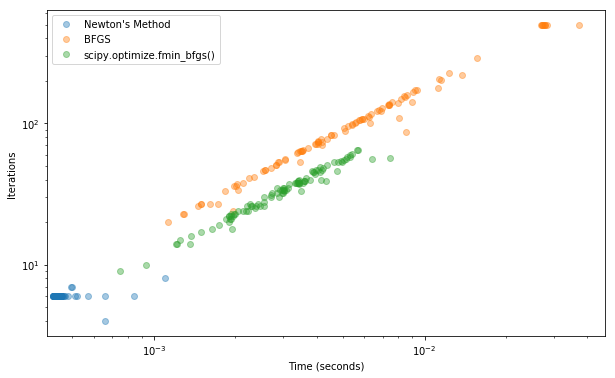

In [142]:
test_methods(100)